## Introduction to CNN Keras - Accuracy 98.14% 

1. Introduction
2. Data preparation
    2.1 Load data
    2.2 Check for null and missing values
    2.3 Normalization
    2.4 Reshape
    2.5 Label encoding
    2.6 Split training and valdiation set
3. CNN
    3.1 Define the model
    3.2 Set the optimizer and annealer
   
4. Evaluate the model
    4.1 Training and validation curves
    4.2 Confusion matrix
5. Prediction and submition
    5.1 Predict and Submit results
    
### 1. Introduction

This is a 5 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. I choosed to build it with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.

I achieved 98.14% of accuracy with this CNN .

For computational reasons, i set the number of steps (epochs) to 2, if you want to achieve 99+% of accuracy set it to 30.

This Notebook follows three main parts:

The data preparation,
The CNN modeling and evaluation,
The results prediction and submission.

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
np.random.seed(2)
from sklearn.metrics import confusion_matrix
import itertools


#### We load the data , divide the feature and target variables
#### Then we initialize the Keras model and fit the data

In [13]:
img_rows, img_cols = 28, 28
num_classes = 10
#We make a data_prep function which returns the feature and target variable
def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)

    num_images = raw.shape[0]
    x_as_array = raw.values[:,1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

#import the data
raw_data = pd.read_csv(r'C:\Users\Thor\Documents\Projects\Image Classification MNIST\train (3).csv')

x, y = data_prep(raw_data)

#Initialize the Keras model
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
#we declare 3 epoch as we have computational barrier
model.fit(x, y,
          batch_size=128,
          epochs=3,
          validation_split = 0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/3
33600/33600 [==============================] - 38s 1ms/sample - loss: 0.2287 - acc: 0.9326 - val_loss: 0.0900 - val_acc: 0.9708
Epoch 2/3
33600/33600 [==============================] - 38s 1ms/sample - loss: 0.0608 - acc: 0.9824 - val_loss: 0.0597 - val_acc: 0.9818
Epoch 3/3
33600/33600 [==============================] - 39s 1ms/sample - loss: 0.0359 - acc: 0.9890 - val_loss: 0.0564 - val_acc: 0.9830


Confusion matrix, without normalization


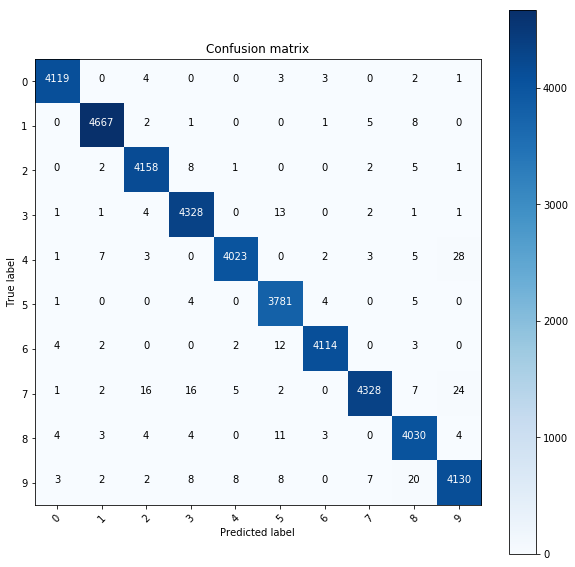

In [14]:
# Predict the values from the validation dataset
Y_pred = model.predict(x)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y,axis = 1) 
# compute the confusion matrix
cnf_matrix = confusion_matrix(Y_true, Y_pred_classes) 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.subplots(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(cnf_matrix, classes = range(10)) 

In [4]:
#we load the test dataset
X_test=pd.read_csv(r'C:\Users\Thor\Documents\Projects\Image Classification MNIST\test (2).csv')
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1,28,28,1)

In [5]:
y_test=model.predict(X_test)#predict the data

In [6]:
y_test = np.argmax(y_test,axis = 1)# take the class having maximum probability

In [7]:
y_test = pd.Series(y_test,name="Label")# put the labels into a series

In [8]:
X_test1=pd.read_csv(r'C:\Users\Thor\Documents\Projects\Image Classification MNIST\test (2).csv')# we load the test data again. Why? we will know next


In [15]:
submission=pd.concat([y_test,X_test1],axis=1)#we concat the label with the test dataset and we export it to .csv file

In [10]:
submission.to_csv("PredictedDigits1.csv",index=False)

In [11]:
rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1

IndentationError: unexpected indent (<ipython-input-11-60c4454b7b3a>, line 2)